In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read "train_wbcd.csv" and print the feature name with numbers of missing entries.

In [61]:
data = pd.read_csv('train_wbcd.csv', header=None)
dataFrame = pd.DataFrame(data)
array = np.array(dataFrame.values)
missVal = []

for i in range(len(array)):
    for j in range(len(array[i])):
        if type(array[i][j]) != str:
            missVal.append([i, j])

print(array[missVal[0][0]][0])
print(array[0][missVal[0][1]])
print(array[missVal[1][0]][0])
print(array[0][missVal[1][1]])

922576
f21
843786
f21


Fill in the missing entries. For filling any feature, you can use either the mean or median value of the feature values from observed entries. Explain the reason behind your choice and print replacement value of each feature.

In [62]:
avgs = []


for i in missVal:
    avg = 0.0
    for j in range(1, len(array)):
        if type(array[j][i[1]]) == str:
            a = array[j][i[1]]
            avg = (avg + float(a))/2
    avgs.append([i, avg])

for i in avgs:
    print(array[i[0][0]][0] + ' replace ' + array[0][i[0][1]] + ' with ' + str(i[1]))
    array[i[0][0]][i[0][1]] = str(i[1])

922576 replace f21 with 16.24180138779893
843786 replace f21 with 16.24180138779893


Encode the categorical variable "Diagnosis" using an appropriate encoding approach and display the encoded values. Justify your selection of encoding approach.  Save the modified data into a csv file. Upload this new file with your submission in OnTrack.

In [118]:
modArray = array.copy()

for i in range(1, len(modArray)):
    if modArray[i][1] == 'B':
        modArray[i][1] = 0
    elif modArray[i][1] == 'M':
        modArray[i][1] = 1
    print(str(array[i][1]) + ' --> ' + str(modArray[i][1]))


column, modArray = modArray[0], modArray[1:]
row, modArray= modArray.T[0], modArray.T[1:]
modArray = modArray.T

df = pd.DataFrame(modArray, columns = column[1:], index = row)
df.to_csv('train_wbcd_finished.csv')

## i chose to substitute B for 0 and M for 1 as there are only two different 
## possible results so using 0 and 1 covers everything i felt that boolean was 
## not appropriate as it may be possible for a different diagnosis could 
## happen and it would be easier to modify the code to accomodate

B --> 0
M --> 1
B --> 0
B --> 0
B --> 0
B --> 0
B --> 0
B --> 0
M --> 1
B --> 0
M --> 1
B --> 0
B --> 0
B --> 0
B --> 0
B --> 0
B --> 0
B --> 0
B --> 0
M --> 1
B --> 0
B --> 0
M --> 1
M --> 1
B --> 0
B --> 0
B --> 0
M --> 1
B --> 0
B --> 0
M --> 1
M --> 1
B --> 0
M --> 1
B --> 0
B --> 0
B --> 0
B --> 0
M --> 1
M --> 1
B --> 0
M --> 1
M --> 1
M --> 1
M --> 1
B --> 0
B --> 0
B --> 0
M --> 1
M --> 1
B --> 0
B --> 0
B --> 0
B --> 0
M --> 1
B --> 0
M --> 1
M --> 1
M --> 1
M --> 1
B --> 0
M --> 1
B --> 0
B --> 0
B --> 0
B --> 0
M --> 1
M --> 1
B --> 0
B --> 0
B --> 0
B --> 0
M --> 1
B --> 0
M --> 1
M --> 1
B --> 0
B --> 0
B --> 0
M --> 1
M --> 1
B --> 0
B --> 0
M --> 1
B --> 0
M --> 1
B --> 0
M --> 1
M --> 1
M --> 1
M --> 1
M --> 1
B --> 0
M --> 1
M --> 1
M --> 1
M --> 1
B --> 0
B --> 0
B --> 0


Apply the min-max scaling on features f1 to f30. Plot distribution of first six features before and after scaling. Is there any difference? Please explain. 

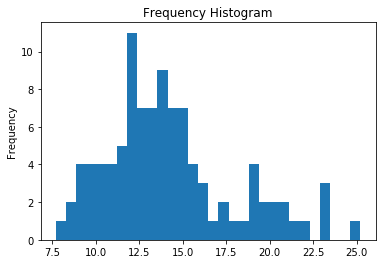

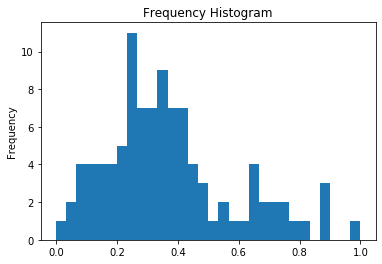

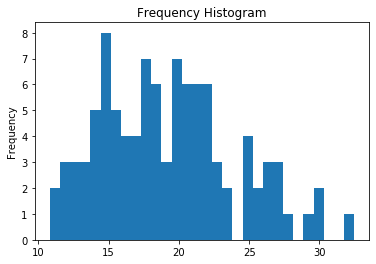

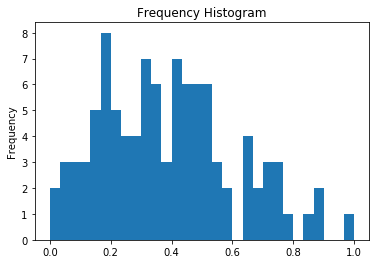

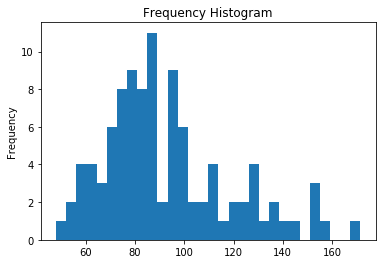

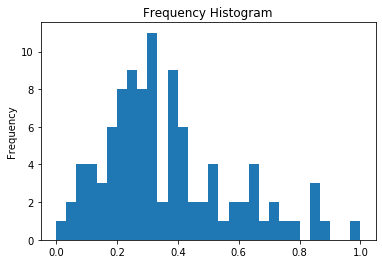

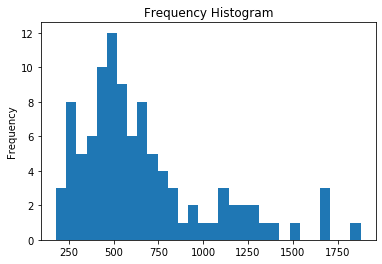

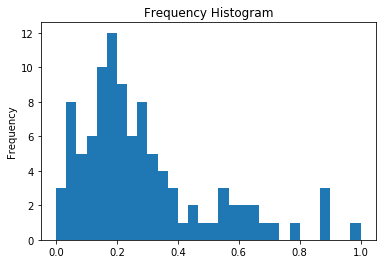

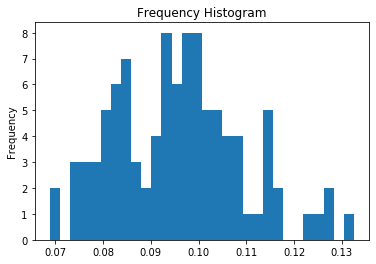

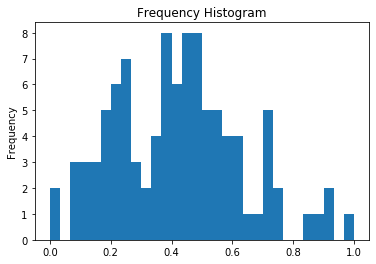

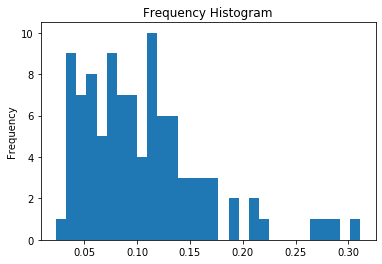

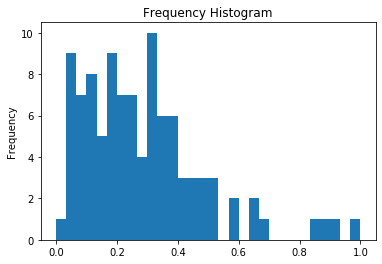

In [119]:
def featureToList(inputArray, i):
    outList = []
    for j in range(1, len(inputArray)):
        outList.append(float(inputArray[j][i]))
    return outList

def plotFeatures(x):
    plt.hist(x, bins=30)
    plt.gca().set(title='Frequency Histogram', ylabel='Frequency');
    
    plt.show()

scaleFac = {}

for i in range(2, len(array[1])):
    column = array[0][i]
    scaleFac[column] = {'max': 0.0, 'min': 9999999999999999.9}
    for j in range(1, len(array)):
        x = float(array[j][i])
        if x >= scaleFac[column]['max']:
            scaleFac[column]['max'] = x
        elif x <= scaleFac[column]['min']:
            scaleFac[column]['min'] = x

modArray = array.copy()

for i in range(2, len(modArray[1])):
    column = modArray[0][i]
    for j in range(1, len(modArray)):
        x = float(modArray[j][i]) - scaleFac[column]['min']
        y = scaleFac[column]['max'] - scaleFac[column]['min']
        modArray[j][i] = x/y

features = []
for i in range(2, 8):
    features.append(featureToList(array, i))

modFeatures = []
for i in range(2, 8):
    modFeatures.append(featureToList(modArray, i))

for i in range(len(features)):
    plotFeatures(features[i])
    plotFeatures(modFeatures[i])   
    
    
## as can be seen with the histograms below the distribution does not change 
## in shape but the x axis is changed to have a scale that goes from 0 to 1
## instead of the initial scale